In [40]:
import pandas as pd

In [41]:

import numpy as np
import mysql.connector

In [42]:
!pip install mysql-connector-python
 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash@2005"
)


In [45]:
 pd.read_sql("SHOW DATABASES", conn)


C:\Users\yasht\AppData\Local\Temp\ipykernel_21520\1368422458.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SHOW DATABASES", conn)


,Database
0,information_schema
1,loan_risker
2,my_practice
3,mysql
4,parks_and_recreation
5,performance_schema
6,practice
7,sakila
8,sys
9,world


In [46]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash@2005",
    database="loan_risker"
)

print("Connected to MySQL")


Connected to MySQL


In [47]:
query = """
SELECT employed, bank_balance, annual_salary, default_flag
FROM loan_default
"""

df = pd.read_sql(query, conn)
df.head()


C:\Users\yasht\AppData\Local\Temp\ipykernel_21520\3710845358.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,employed,bank_balance,annual_salary,default_flag
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [48]:
df.shape

(10000, 4)

In [49]:
df.info

<bound method DataFrame.info of       employed  bank_balance  annual_salary  default_flag
0            1       8754.36      532339.56             0
1            0       9806.16      145273.56             0
2            1      12882.60      381205.68             0
3            1       6351.00      428453.88             0
4            1       9427.92      461562.00             0
...        ...           ...            ...           ...
9995         1       8538.72      635908.56             0
9996         1       9095.52      235928.64             0
9997         1      10144.92      703633.92             0
9998         1      18828.12      440029.32             0
9999         0       2411.04      202355.40             0

[10000 rows x 4 columns]>

In [50]:
df['default_flag'].value_counts(normalize=True)


default_flag
0    0.9667
1    0.0333
Name: proportion, dtype: float64

In [51]:
df.describe()


,employed,bank_balance,annual_salary,default_flag
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [52]:
X = df[['employed', 'bank_balance', 'annual_salary']]
y = df['default_flag']


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [22]:
y_pred = model.predict(X_test_scaled)


In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1651,  282],
       [   8,   59]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1933
           1       0.17      0.88      0.29        67

    accuracy                           0.85      2000
   macro avg       0.58      0.87      0.60      2000
weighted avg       0.97      0.85      0.90      2000



In [26]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_prob

array([1.56562112e-01, 9.57231758e-01, 6.81340329e-02, ...,
       6.45468482e-01, 1.21375282e-01, 3.34488250e-04])

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

auc


np.float64(0.9487070596320004)

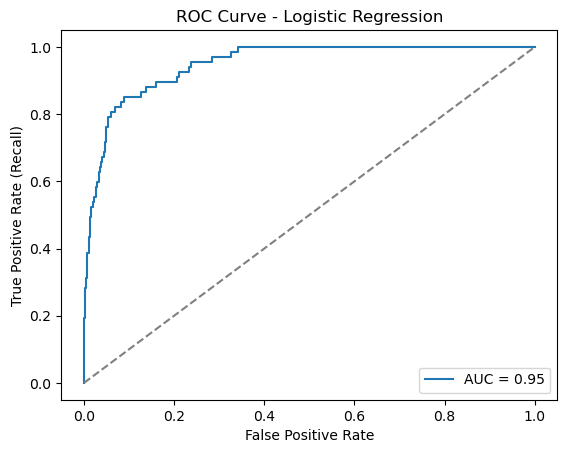

In [29]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred_03 = (y_prob >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))


[[1486  447]
 [   5   62]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1933
           1       0.12      0.93      0.22        67

    accuracy                           0.77      2000
   macro avg       0.56      0.85      0.54      2000
weighted avg       0.97      0.77      0.85      2000



In [32]:
X = df[['employed', 'bank_balance', 'annual_salary']]
y = df['default_flag']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [34]:
y_pred_rf = rf_model.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[1919   14]
 [  48   19]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1933
           1       0.58      0.28      0.38        67

    accuracy                           0.97      2000
   macro avg       0.78      0.64      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [36]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_rf)


np.float64(0.8772266448409788)

In [38]:
y_pred_rf_03 = (y_prob_rf >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_rf_03))
print(classification_report(y_test, y_pred_rf_03))


[[1896   37]
 [  38   29]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1933
           1       0.44      0.43      0.44        67

    accuracy                           0.96      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.96      0.96      0.96      2000



In [54]:
results_df = X_test.copy()

results_df['actual_default'] = y_test.values
results_df['predicted_default'] = y_pred_03   # threshold = 0.3
results_df['default_probability'] = y_prob


In [55]:
results_df.to_csv("results/predictions_logistic_regression.csv", index=False)


In [56]:
from sklearn.metrics import classification_report
import json

report = classification_report(y_test, y_pred_03, output_dict=True)

with open("results/classification_report_logreg.json", "w") as f:
    json.dump(report, f, indent=4)


In [57]:
pd.DataFrame(report).transpose().to_csv(
    "results/classification_report_logreg.csv"
)


In [58]:
model_info = {
    "model": "Logistic Regression",
    "roc_auc": auc,
    "threshold": 0.3,
    "reason": "Lowered threshold to increase recall for defaulters due to high business cost of false negatives"
}

with open("results/model_decision.json", "w") as f:
    json.dump(model_info, f, indent=4)


In [59]:
import joblib

joblib.dump(model, "models/logistic_regression_model.pkl")
joblib.dump(scaler, "models/standard_scaler.pkl")


['models/standard_scaler.pkl']